## Segmentation leads to binary images . They can be obtained using Thresholding

In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
bw=cv2.imread('3d.jpg',0)

In [5]:
height,width=bw.shape[0:2]

In [6]:
binary=np.zeros([height,width,1],'uint8')
threshold=85
for row in range(height):
    for col in range(width):
        if bw[row][col]>threshold:
            binary[row][col]=255
            
cv2.imshow("Slow bin",binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
cv2.imshow("original bw",bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

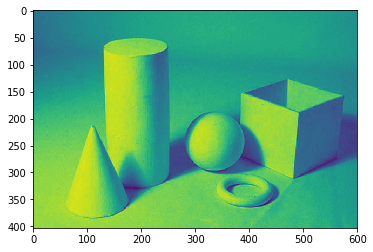

In [8]:
plt.imshow(bw)
plt.show()

In [9]:
bin = cv2.cvtColor(binary, cv2.COLOR_BGR2GRAY)


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


In [10]:
binary.shape

(403, 600, 1)

In [11]:
ret,thresh=cv2.threshold(bw,threshold,255,cv2.THRESH_BINARY) # image,value,max,type

In [12]:
thresh.shape

(403, 600)

In [13]:
cv2.imshow("thresh",thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

## look for other segmentation methods

## Adaptive thresholding

no global threshold, but looks in neighbourhood to find threshold. This solves the lighting condition problem

In [14]:
sudoku=cv2.imread('sudo.JPG',0)

In [15]:
cv2.imshow("sudoku",sudoku)
cv2.waitKey(0)
cv2.destroyAllWindows()

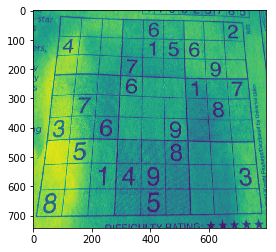

In [16]:
plt.imshow(sudoku)

In [17]:
ret,basic_thresh=cv2.threshold(sudoku,70,255,cv2.THRESH_BINARY) # image,value,max,type
cv2.imshow("basic thresh",basic_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
adaptive_thresh=cv2.adaptiveThreshold(sudoku,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1) # last 2 are neighbourhood size and mean subtraction from result
cv2.imshow("ada thresh",adaptive_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Skin Detection and Composite Filtering

In [29]:
img=cv2.imread('faces2.jpg',1)

In [30]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [31]:
h=hsv[:,:,0]

In [32]:
s=hsv[:,:,1]

In [33]:
v=hsv[:,:,2]

In [34]:
hsv_split=np.concatenate((h,s,v),axis=1)

In [35]:
cv2.imshow("Split",hsv_split)
cv2.waitKey(0)
cv2.destroyAllWindows()

### we need to do a combination of hue and saturation filtering

In [36]:
ret,min_sat=cv2.threshold(s,40,255,cv2.THRESH_BINARY)
cv2.imshow("sat filtered",min_sat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
ret,max_hue=cv2.threshold(h,15,255,cv2.THRESH_BINARY_INV)
cv2.imshow("sat filtered",max_hue)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
final=cv2.bitwise_and(min_sat,max_hue)
cv2.imshow(" fin",final)
cv2.waitKey(0)
cv2.destroyAllWindows()